/tmp/ipykernel_1762448/4022907220.py:67: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  patches.Patch(color='lavender', edgecolor='black', label='Aggregated Claims Data')


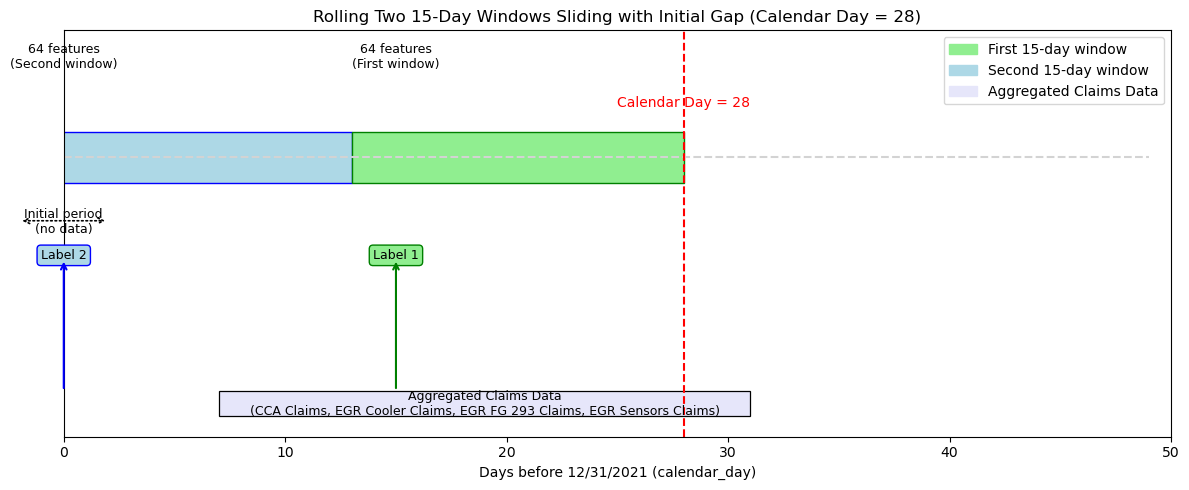

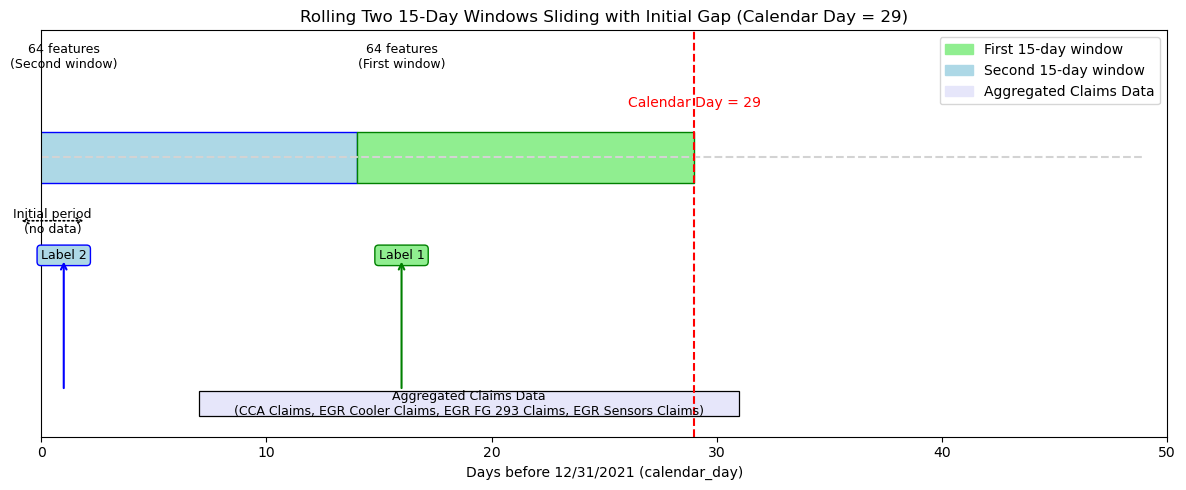

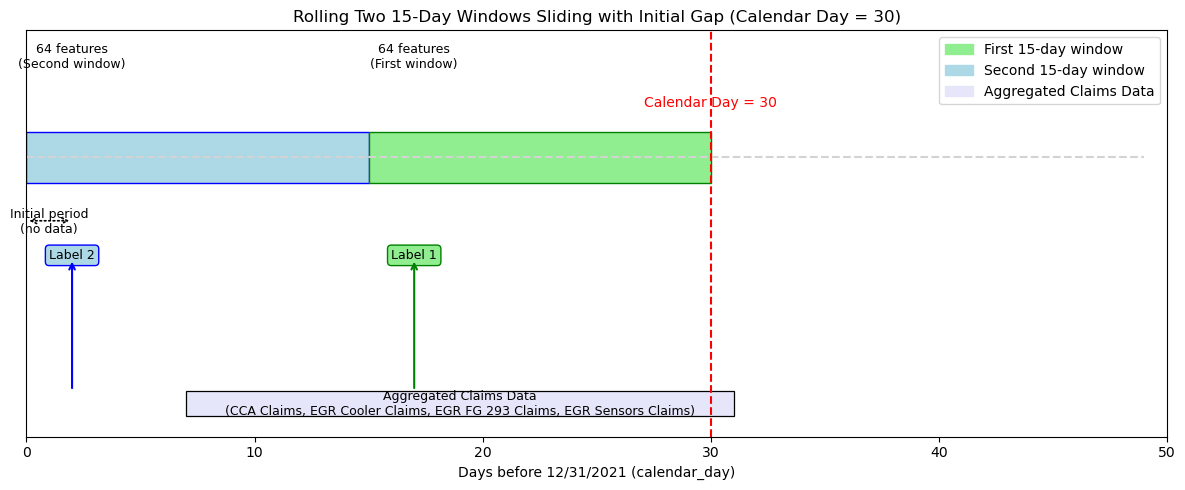

In [4]:

import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_rolling_window_with_gap(calendar_day):
    fig, ax = plt.subplots(figsize=(12, 5))

    # Define window positions
    window_size = 15
    first_window_start = calendar_day - window_size
    second_window_start = calendar_day - 2 * window_size

    # Timeline
    calendar_days = list(range(50))
    ax.plot(calendar_days, [1] * len(calendar_days), color='lightgray', linestyle='--')

    # Highlight windows
    ax.add_patch(patches.Rectangle((second_window_start, 0.9), window_size, 0.2,
                                   linewidth=1, edgecolor='blue', facecolor='lightblue'))
    ax.add_patch(patches.Rectangle((first_window_start, 0.9), window_size, 0.2,
                                   linewidth=1, edgecolor='green', facecolor='lightgreen'))

    # Vertical calendar day line
    ax.axvline(x=calendar_day, color='red', linestyle='--')

    # Left gap annotation
    gap_end = second_window_start
    ax.annotate('', xy=(2, 0.75), xytext=(gap_end, 0.75),
                arrowprops=dict(arrowstyle='<->', lw=1.2, linestyle='dotted'))
    ax.text((2 + gap_end) / 2, 0.7, 'Initial period\n(no data)', fontsize=9, ha='center')

    # Label positions
    ax.text(calendar_day - 28, 0.6, 'Label 2', fontsize=9, ha='center',
            bbox=dict(boxstyle="round", fc="lightblue", ec="blue"))
    ax.text(calendar_day - 13, 0.6, 'Label 1', fontsize=9, ha='center',
            bbox=dict(boxstyle="round", fc="lightgreen", ec="green"))

    # Arrows to claims data
    ax.annotate('', xy=(calendar_day - 28, 0.6), xytext=(calendar_day - 28, 0.08),
                arrowprops=dict(arrowstyle='->', lw=1.5, color='blue'))
    ax.annotate('', xy=(calendar_day - 13, 0.6), xytext=(calendar_day - 13, 0.08),
                arrowprops=dict(arrowstyle='->', lw=1.5, color='green'))

    # Claims data box
    claims_box_x = [7, 31]
    claims_box_y = -0.02
    ax.add_patch(patches.Rectangle((claims_box_x[0], claims_box_y),
                                   claims_box_x[1] - claims_box_x[0], 0.1,
                                   linewidth=0.9, edgecolor='black', facecolor='lavender'))
    ax.text((claims_box_x[0] + claims_box_x[1]) / 2, claims_box_y + 0.05,
            'Aggregated Claims Data\n(CCA Claims, EGR Cooler Claims, EGR FG 293 Claims, EGR Sensors Claims)',
            fontsize=9, ha='center', va='center')

    # Text annotations
    ax.text(calendar_day, 1.2, f'Calendar Day = {calendar_day}', color='red', fontsize=10, ha='center')
    ax.text(calendar_day - 13, 1.35, '64 features\n(First window)', fontsize=9, ha='center')
    ax.text(calendar_day - 28, 1.35, '64 features\n(Second window)', fontsize=9, ha='center')

    # Formatting
    ax.set_ylim(-0.1, 1.5)
    ax.set_xlim(0, 50)
    ax.set_yticks([])
    ax.set_xlabel('Days before 12/31/2021 (calendar_day)')
    ax.set_title(f'Rolling Two 15-Day Windows Sliding with Initial Gap (Calendar Day = {calendar_day})')
    ax.legend(handles=[
        patches.Patch(color='lightgreen', label='First 15-day window'),
        patches.Patch(color='lightblue', label='Second 15-day window'),
        patches.Patch(color='lavender', edgecolor='black', label='Aggregated Claims Data')
    ], loc='upper right')

    plt.tight_layout()
    return fig

# Generate and show figures
fig1 = draw_rolling_window_with_gap(calendar_day=28)
fig2 = draw_rolling_window_with_gap(calendar_day=29)
fig3 = draw_rolling_window_with_gap(calendar_day=30)

fig1.show()
fig2.show()
fig3.show()
